**Authors:** Dominik Borovský, Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Hake ratio - real data
</font>

<font size=5> Computational tools: </font>  **<font size=5>SageMath (Numpy)</font>**  

---

# Ratio Distribution for Hake normalized gain

# Hinkley, Fieller correlated form

In [1]:
%%capture
%run HinkleyMarsaglia.ipynb

# Observed data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/2020Coletta_g_pre_36c_ASA_CLEAN.csv')
data_g = df['g']

# Estimation of parameters of $f_W$ from sample

In [4]:
pre_mean, pre_std = df['pre'].mean(), df['pre'].std()
post_mean, post_std = df['post'].mean(), df['post'].std()
rho_pre_post = df['pre'].corr(df['post'])

pre_mean, pre_std, post_mean, post_std, rho_pre_post

(24.358852083133133,
 3.9112599362318456,
 60.719985331089156,
 7.224069703455069,
 0.29185175074093994)

In [5]:
mu_u = post_mean - pre_mean
sigma_u = np.sqrt(pre_std**2 + post_std**2 - (2*rho_pre_post*post_std*pre_std))
mu_v = 100 - pre_mean
sigma_v = pre_std
rho_u_v = pre_std/sigma_u - (rho_pre_post*post_std/sigma_u)
mu_u, sigma_u, mu_v, sigma_v, rho_u_v

(36.36113324795602,
 7.140901188524559,
 75.64114791686687,
 3.9112599362318456,
 0.25247549268727715)

In [6]:
bins_k = 2
num_bins = int(np.ceil(np.log2(len(df['pre']) + 1)*bins_k))

In [7]:
# Sample data
data = df['g']

# Histogram calculation
counts, bin_edges = np.histogram(data, bins=num_bins)
bin_max = np.argmax(counts)
mode = (bin_edges[bin_max] + bin_edges[bin_max + 1]) / 2

# Bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Weighted mean (using bin centers and counts)
weighted_mean = np.sum(bin_centers * counts) / np.sum(counts)
counts, bin_centers

(array([2, 3, 5, 7, 8, 5, 2, 3, 0, 0, 1]),
 array([0.3215946 , 0.36394392, 0.40629325, 0.44864257, 0.4909919 ,
        0.53334122, 0.57569055, 0.61803987, 0.66038919, 0.70273852,
        0.74508784]))

# Plotting

In [8]:
# Scaling factors for plotting
Range, cols, N = bin_centers.max() - bin_centers.min(), len(counts), sum(counts)
A = Range/cols*N

In [9]:
# values
from numpy import array as v
values = [m1v, s1v, m2v, s2v, rv] = mu_u, sigma_u, mu_v, sigma_v, 0
values_rounded = [round(val, 2) for val in values]
sub = [m1 == m1v, s1 == s1v, m2 == m2v, s2 == s2v]
rlist = [0,0.3,..,0.9] + [RR(rho_u_v)]

In [10]:
# Parameters for the graph
farba = ['blue', 'red', 'green', 'magenta','aqua', 'black']
# graphTitle = f'Density function of the ratio: $\\hat\\mu_1, \\hat\\sigma_1, \\hat\\mu_2, \\hat\\sigma_2 =$ {tuple(values_rounded[:-1])}'
graphTitle = f'Distribution of $g$ and various corresponding $f_W$\'s\n$\\hat\\mu_1, \\hat\\sigma_1, \\hat\\mu_2, \\hat\\sigma_2 =$ {tuple(values_rounded[:-1])}'
xmin, xmax = 0, 1

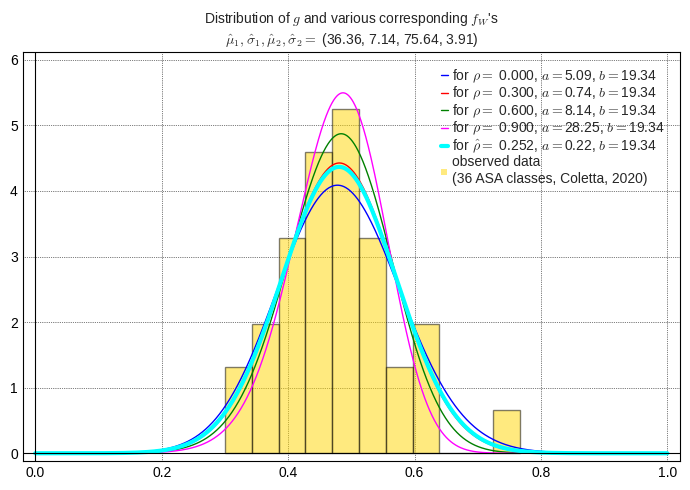

In [11]:
gf = plot([], figsize=(7, 5), title=graphTitle, frame=True, gridlines=True, ymax=6, axes=['g',None])

for i, rvv in enumerate(list(rlist)):
    avs = at.subs(sub).subs(r == rvv).n(digits=2)
    bvs = bt.subs(sub).subs(r == rvv).n(digits=2)
    rvs = rvv.n(digits=3)
    if rvv==RR(rho_u_v):
        legenda = f'for $\\hat\\rho=$ {rvs}, $a =${abs(round(avs,2))}, $b = ${abs(round(bvs,2))} '
        gf+= plot(fMars(t).subs(sub).subs(r == rvv), (t, xmin, xmax), color=farba[i], thickness=3, 
                  legend_label = legenda)
    else:
        legenda = f'for $\\rho=$ {rvs}, $a =${abs(round(avs,2))}, $b = ${abs(round(bvs,2))} '
        gf+= plot(fMars(t).subs(sub).subs(r == rvv), (t, xmin, xmax), color=farba[i], thickness=1, 
                  legend_label = legenda)

gf += points([0.5,10], color='gold', marker='s', size=50, alpha=.5, legend_label='observed data\n(36 ASA classes, Coletta, 2020)')
gf += histogram(data_g, density=True, bins=num_bins, alpha=0.5, color='gold')
gf

In [12]:
# gf.save('figs/g_distr_ASA_coletta.png', dpi=300)

# Bivariate hypothetical data

In [13]:
subs_pham = [m1==95-90, m2==100-90, s1==2.5, s2==40]
subs_pham

[mu1 == 5, mu2 == 10, sigma1 == 2.50000000000000, sigma2 == 40]

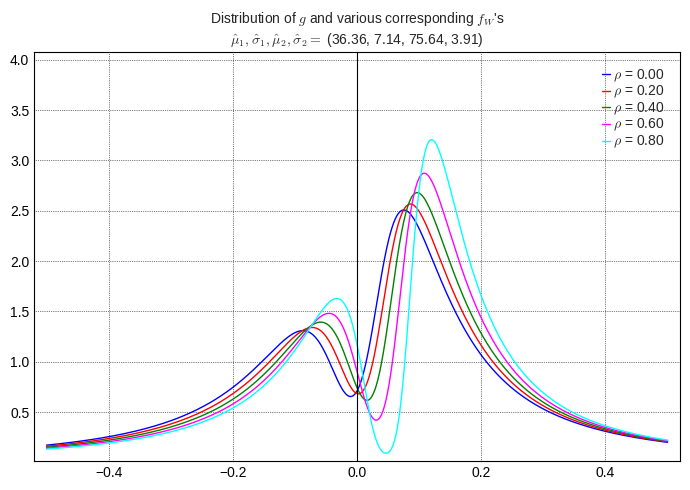

In [14]:
gf3 = plot([], figsize=(7, 5), title=graphTitle, frame=True, gridlines=True, ymax=4)

for i, rho in enumerate([0,0.2.. 0.8]):
    gf3 += plot(fMars(t).subs(subs_pham).subs(r==rho), (t,-.5,.5), color=farba[i], legend_label=f'$\\rho$ = {rho.n(digits=1)}')

gf3

In [15]:
# gf3.save('figs/Modality.png', dpi=300)

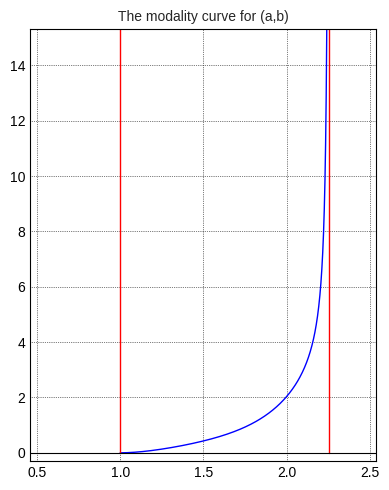

In [16]:
graphTitle = f'The modality curve for (a,b)'
b(a) = (18.621 - 63.411*a + 84.041*a**2 - 
        54.668*a**3 + 17.716*a**4 - 2.2986*a**5) / (2.256058904 - a)

gf3 = plot([], figsize=(4,5), title=graphTitle, frame=True, gridlines=True, ymax=15)
gf3 += plot(b(t), (t,1,2.256058904), color='blue')

# Add a vertical line at x=2.256058904 in red color
gf3 += line([(2.256058904, 0), (2.256058904, 15.5)], color='red')
gf3 += line([(1, 0), (1, 15.5)], color='red')

gf3.show(ymin=0, xmin=0.5, xmax=2.5, ymax=15)

In [17]:
# gf3.save('figs/ModalityCurve.png', dpi=300)